In [247]:
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [248]:
#importing the dataset

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
#df_test.info()
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


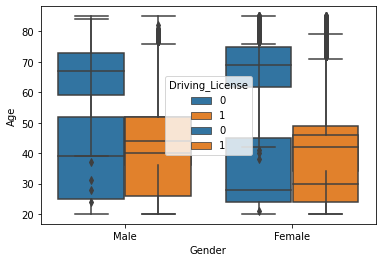

In [250]:
#Visualization

sns.boxplot(x='Gender', y='Age', hue='Response', data=df_train)
sns.boxplot(x='Gender', y='Age', hue='Driving_License', data=df_train)

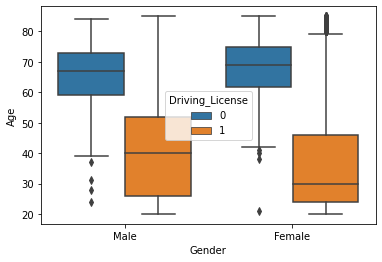

In [251]:
#Visualization

sns.boxplot(x='Gender', y='Age', hue='Driving_License', data=df_train)

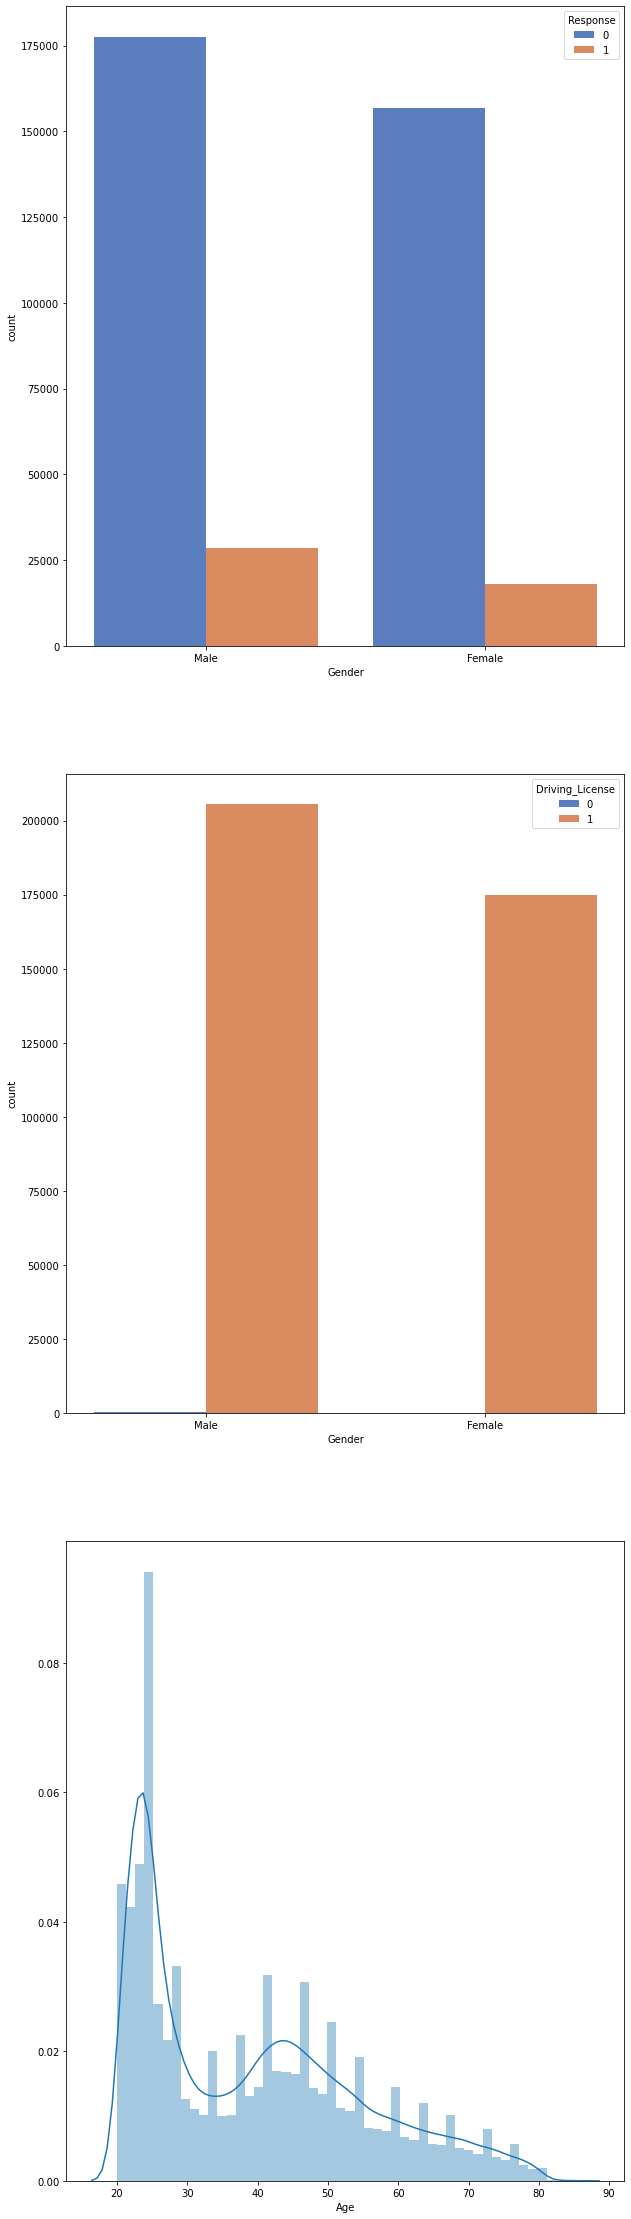

In [252]:
#Visualization

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,40))

sns.countplot(x='Gender', hue='Response', ax=ax1, palette='muted', data=df_train)
sns.countplot(x='Gender', hue='Driving_License', ax=ax2, palette='muted', data=df_train)
sns.distplot(df_train['Age'], ax=ax3)

plt.show()



In [253]:
#Checking the Columns value counts and label percentage

#df_train.groupby('Age')['Driving_License'].count()
#df_train.groupby('Driving_License')['Age'].count()

display('Driving_License', df_train['Driving_License'].value_counts())

display('Response', df_train['Response'].value_counts())

(len(df_train[df_train['Response']==1]))/(len(df_train))*100

print("Response percentage - Yes:" ,(len(df_train[df_train['Response']==1]))/(len(df_train))*100)
print("Response percentage - No:" ,(len(df_train[df_train['Response']==0]))/(len(df_train))*100)

'Driving_License'

1    380297
0       812
Name: Driving_License, dtype: int64

'Response'

0    334399
1     46710
Name: Response, dtype: int64

Response percentage - Yes: 12.256336113815209
Response percentage - No: 87.74366388618479


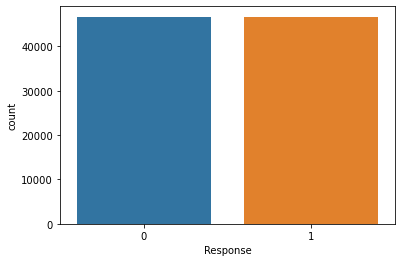

In [254]:
# Shuffle the Dataset.

shuffled_df = df_train.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
yes_df = shuffled_df.loc[shuffled_df['Response'] == 1]

#Randomly select 46710 observations from the no-response (majority class)
no_df = shuffled_df.loc[shuffled_df['Response'] == 0].sample(n=46710,random_state=42)

# Concatenate both dataframes again
balanced_df = pd.concat([yes_df, no_df])

sns.countplot('Response', data=balanced_df)

In [255]:
#Checking the Columns value counts

display('No driving license, Vechile Age', balanced_df['Vehicle_Age'].value_counts())
display('No driving license, Insured', balanced_df['Previously_Insured'].value_counts())
display('No driving license, Response', balanced_df['Response'].value_counts())

'No driving license, Vechile Age'

1-2 Year     57783
< 1 Year     29307
> 2 Years     6330
Name: Vehicle_Age, dtype: int64

'No driving license, Insured'

0    68648
1    24772
Name: Previously_Insured, dtype: int64

'No driving license, Response'

1    46710
0    46710
Name: Response, dtype: int64

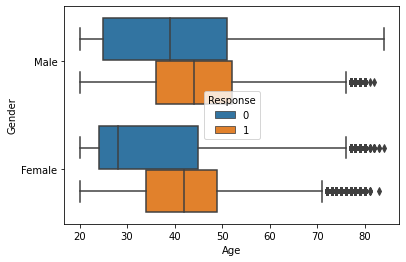

In [257]:
#Visualization

sns.boxplot(x='Age', y='Gender', hue='Response', data=balanced_df)

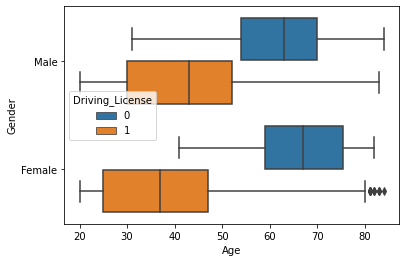

In [258]:
#Visualization

sns.boxplot(x='Age', y='Gender', hue='Driving_License', data=balanced_df)

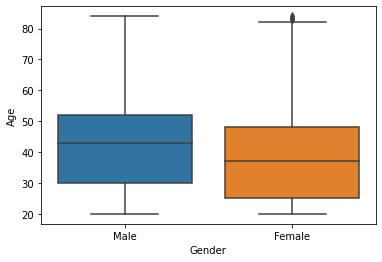

In [259]:
#Visualization

sns.boxplot(y=balanced_df['Age'], x=balanced_df['Gender'])

In [261]:
# Finding and removing the outliers

from scipy import stats

z = np.abs(stats.zscore(balanced_df['Age']))
print(z)
print(np.where(z > 3))

#balanced_df_final = balanced_df[(z < 3).all(axis=1)]

#balanced_df.shape, balanced_df_final.shape 


[0.22622125 1.37815333 1.2386425  ... 0.68059917 0.36573209 0.22622125]
(array([87559, 89228], dtype=int32),)


In [263]:
#Removing the outliers

balanced_df_final = balanced_df[balanced_df['Age'] < 84]
balanced_df_final.shape
model_test.columns

Index(['id', 'Age', 'Previously_Insured', 'Annual_Premium', 'Vintage',
       'Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [265]:
#Categorical to numerical types

model_train = pd.get_dummies(balanced_df_final)
model_test = pd.get_dummies(df_test)

In [266]:
#displaying the info of the test and train

model_train.info()
model_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93418 entries, 330374 to 183541
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     93418 non-null  int64  
 1   Age                    93418 non-null  int64  
 2   Driving_License        93418 non-null  int64  
 3   Region_Code            93418 non-null  float64
 4   Previously_Insured     93418 non-null  int64  
 5   Annual_Premium         93418 non-null  float64
 6   Policy_Sales_Channel   93418 non-null  float64
 7   Vintage                93418 non-null  int64  
 8   Response               93418 non-null  int64  
 9   Gender_Female          93418 non-null  uint8  
 10  Gender_Male            93418 non-null  uint8  
 11  Vehicle_Age_1-2 Year   93418 non-null  uint8  
 12  Vehicle_Age_< 1 Year   93418 non-null  uint8  
 13  Vehicle_Age_> 2 Years  93418 non-null  uint8  
 14  Vehicle_Damage_No      93418 non-null  uint8  
 

In [267]:
#Train Test Split of data

X = model_train.drop(columns=['Response','id','Driving_License','Region_Code','Policy_Sales_Channel','Age'], axis=1)
y = model_train['Response']

model_test = model_test.drop(columns=['Driving_License','Region_Code','Policy_Sales_Channel','Age'])

test_final = model_test.drop('id' ,axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [268]:
#Checking the size of the test and training sets

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((65392, 10), (65392,), (28026, 10), (28026,))

# LogisticRegression

In [269]:
#Machine Learning Models: Training and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model_logistic = LogisticRegression(solver='liblinear')

model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

y_pred_test = model_logistic.predict(test_final)

traning_acc_lr = model_logistic.score(X_train,y_train)
testing_acc_lr = accuracy_score(y_test,y_pred)

print('............. LOGISTIC REGRESSION METRICS ...............')
print('Training Accuracy :',traning_acc_lr)
print('Testing Accuracy  :',testing_acc_lr)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

............. LOGISTIC REGRESSION METRICS ...............
Training Accuracy : 0.7865946904820161
Testing Accuracy  : 0.7871262399200742
[[ 8297  5636]
 [  330 13763]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     13933
           1       0.71      0.98      0.82     14093

    accuracy                           0.79     28026
   macro avg       0.84      0.79      0.78     28026
weighted avg       0.83      0.79      0.78     28026



# Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)
Y_predRf = random_forest.predict(X_test)

y_pred_test_rf = random_forest.predict(test_final)

traning_acc_rf = random_forest.score(X_train,y_train)
testing_acc_rf = accuracy_score(y_test,Y_predRf)

print('............. RANDOM FOREST METRICS ...............')
print('Training Accuracy :',traning_acc_rf)
print('Testing Accuracy  :',testing_acc_rf)
print(confusion_matrix(y_test,Y_predRf))
print(classification_report(y_test,Y_predRf))


#Feature importance 

names = X_train.columns.values

print("Features sorted by their score:")
print(sorted(zip(map(lambda X_train: round(X_train, 4), random_forest.feature_importances_), names), reverse=True))

............. RANDOM FOREST METRICS ...............
Training Accuracy : 0.999938830437974
Testing Accuracy  : 0.7834867622921573
[[ 9584  4349]
 [ 1719 12374]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76     13933
           1       0.74      0.88      0.80     14093

    accuracy                           0.78     28026
   macro avg       0.79      0.78      0.78     28026
weighted avg       0.79      0.78      0.78     28026

Features sorted by their score:
[(0.176, 'Vintage'), (0.1572, 'Annual_Premium'), (0.1361, 'Age'), (0.1224, 'Vehicle_Damage_No'), (0.1191, 'Vehicle_Damage_Yes'), (0.1009, 'Previously_Insured'), (0.0891, 'Region_Code'), (0.066, 'Policy_Sales_Channel'), (0.0139, 'Vehicle_Age_< 1 Year'), (0.0112, 'Vehicle_Age_1-2 Year'), (0.0027, 'Vehicle_Age_> 2 Years'), (0.0027, 'Gender_Male'), (0.0027, 'Gender_Female')]


# AdaBoostClassifier

In [276]:
#AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1)

model.fit(X_train, y_train)
ypredict_AdaBoost = model.predict(X_test)

y_pred_test_AB = model.predict(test_final)

traning_acc_AdaBoost = model.score(X_train, y_train)
testing_acc_AdaBoost = accuracy_score(y_test,ypredict_AdaBoost)

print('............. AdaBoostclassifier METRICS ...............')
print('Training Accuracy :',traning_acc_AdaBoost)
print('Testing Accuracy  :',testing_acc_AdaBoost)
print(confusion_matrix(y_test,ypredict_AdaBoost))
print(classification_report(y_test,ypredict_AdaBoost))


............. AdaBoostclassifier METRICS ...............
Training Accuracy : 0.7865946904820161
Testing Accuracy  : 0.7870548776136445
[[ 8296  5637]
 [  331 13762]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     13933
           1       0.71      0.98      0.82     14093

    accuracy                           0.79     28026
   macro avg       0.84      0.79      0.78     28026
weighted avg       0.83      0.79      0.78     28026



# GradientBoostingClassifier

In [273]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

model_GB= GradientBoostingClassifier(learning_rate=0.01,random_state=1)


model_GB.fit(X_train, y_train)
ypredict_GB = model_GB.predict(X_test)

y_pred_test_GB = model_GB.predict(test_final)

traning_acc_GB = model.score(X_train, y_train)
testing_acc_GB = accuracy_score(y_test,ypredict_GB)

print('.............GradientBoostingClassifier METRICS ...............')
print('Training Accuracy :',traning_acc_GB)
print('Testing Accuracy  :',testing_acc_GB)
print(confusion_matrix(y_test,ypredict_GB))
print(classification_report(y_test,ypredict_GB))

.............GradientBoostingClassifier METRICS ...............
Training Accuracy : 0.7865946904820161
Testing Accuracy  : 0.7871262399200742
[[ 8297  5636]
 [  330 13763]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     13933
           1       0.71      0.98      0.82     14093

    accuracy                           0.79     28026
   macro avg       0.84      0.79      0.78     28026
weighted avg       0.83      0.79      0.78     28026



# Correlation Matrix

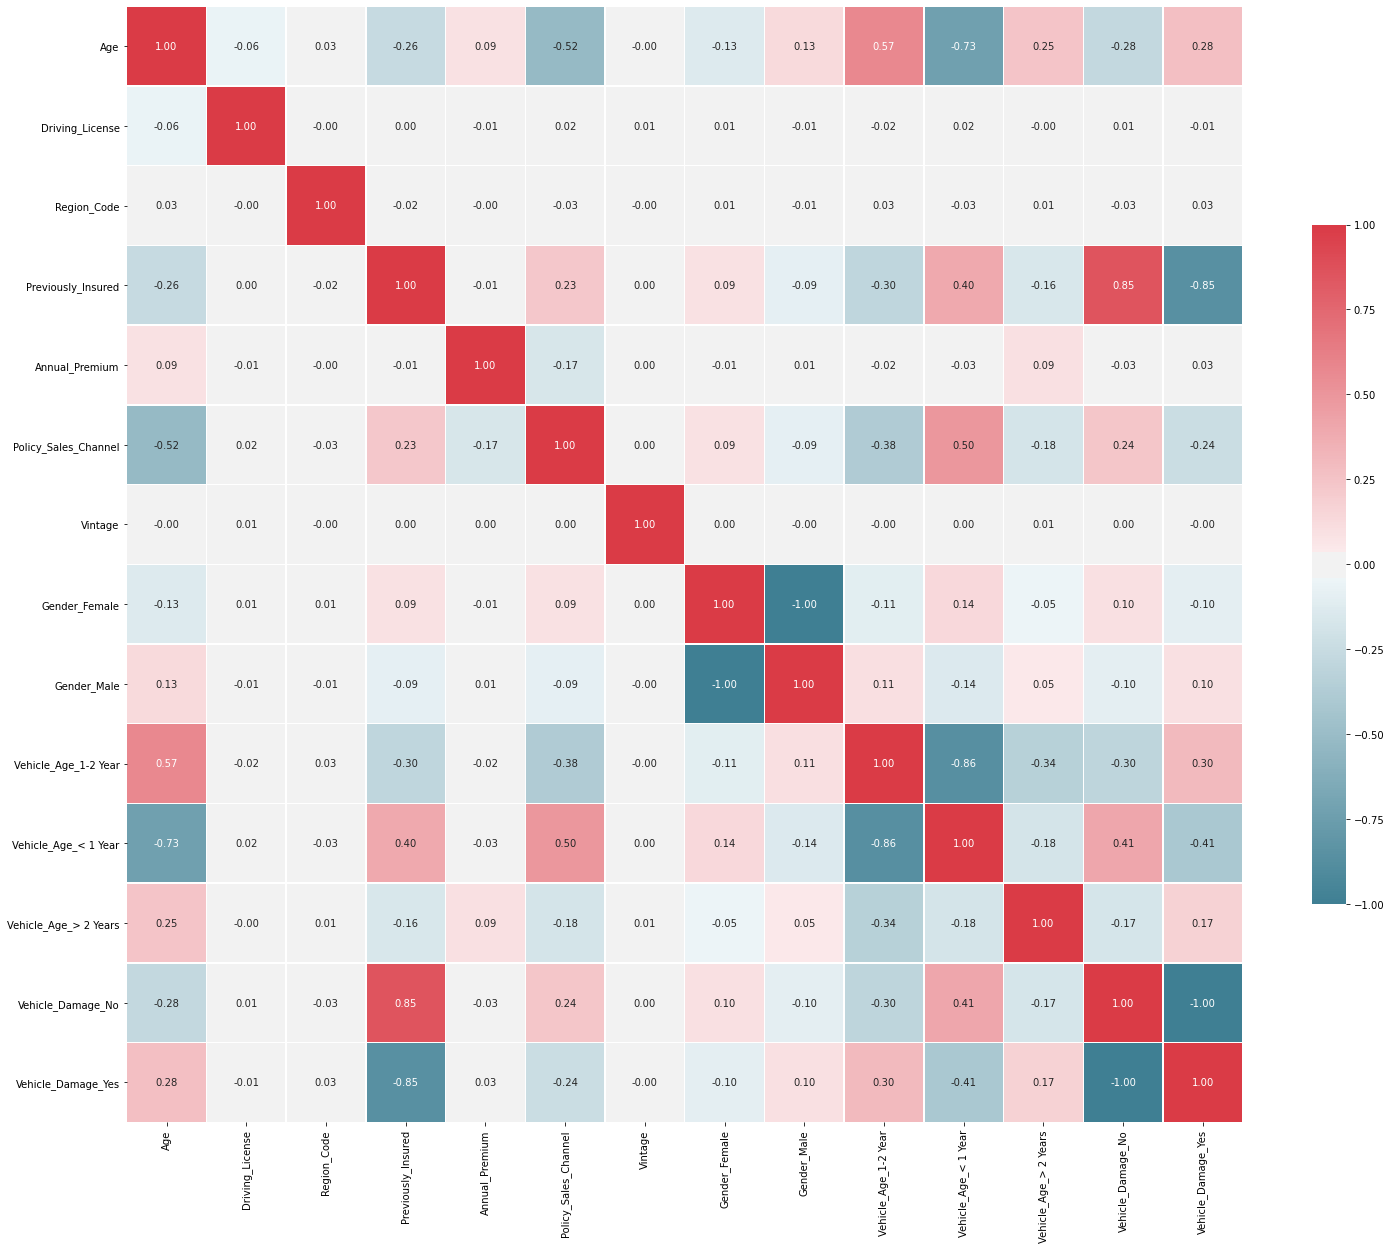

In [73]:
#Correlation Matrix

plt.figure(figsize=(25, 25))

corr = X_train.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [75]:
#Picking the most correlated columns

mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr_mask = corr.mask(mask)
#c = [c for c in corr.columns if any (corr[c] > 0.90)]

corr_values_numerical = [c for c in corr_mask.columns if any(corr_mask[c] >= 0.90)]
corr_values_numerical

[]

# ROC_CURVE

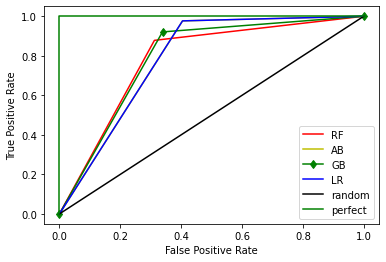

In [271]:
from sklearn.metrics import roc_curve

fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test,y_pred)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test,Y_predRf)
fpr_AB, tpr_AB, thresholds_AB = roc_curve(y_test,ypredict_AdaBoost)
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_test,ypredict_GB)

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_AB, tpr_AB,'y-',label = 'AB')
plt.plot(fpr_GB, tpr_GB,'dg-',label = 'GB')

plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')

plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# ROC_AUC_SCORE

AUC LR:0.786
AUC RF:0.783
AUC AB:0.786
AUC GB:0.791


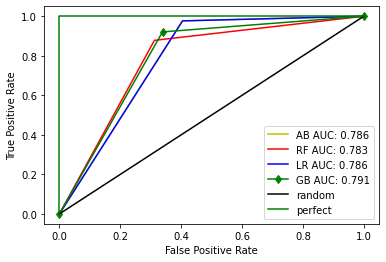

In [272]:

from sklearn.metrics import roc_auc_score

auc_LR = roc_auc_score(y_test,y_pred)
auc_RF = roc_auc_score(y_test,Y_predRf)
auc_AB = roc_auc_score(y_test,ypredict_AdaBoost)
auc_GB = roc_auc_score(y_test,ypredict_GB)

print('AUC LR:%.3f'% auc_LR)
print('AUC RF:%.3f'% auc_RF)
print('AUC AB:%.3f'% auc_AB)
print('AUC GB:%.3f'% auc_GB)

plt.plot(fpr_AB, tpr_AB,'y-',label = 'AB AUC: %.3f'%auc_AB)
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)

plt.plot(fpr_GB, tpr_GB,'dg-', label= 'GB AUC: %.3f'%auc_GB)

plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [277]:
#Submission Result

submission = pd.DataFrame({
           'id' : model_test['id'],
           'Response' : y_pred_test_AB
})

submission.shape

submission.to_csv('submission_6.csv', index=False)

In [280]:
#Checking

Q1 = balanced_df['Age'].quantile(0.25)
Q3 = balanced_df['Age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

#filter = (balanced_df['Age'] > Q1 - 1.5 * IQR) | (balanced_df['Age'] > Q3 + 1.5 *IQR)

filter = (balanced_df['Age'] < (Q1 - 1.5 * IQR)) | (balanced_df['Age']> (Q3 + 1.5 * IQR))


#boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

#print(boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))

#balanced_df.loc[~filter]  
